## 18IT010 Yagnik Bavishi

Dataset : MNIST Dataset

The mnist dataset is conveniently provided to us as part of the Keras library, so we can easily load the dataset. Out of the 70,000 images provided in the dataset, 60,000 are given for training and 10,000 are given for testing.

In [69]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint

In [70]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_drawing = x_train

In [71]:
image_size = 784 # 28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)

In [72]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [73]:
model = Sequential()
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


## For batch size=128

In [74]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

In [75]:
history=model.fit(x_train, 
                      y_train,
                      validation_data=(x_test, y_test),
                      batch_size=128,
                      epochs=5,
                      validation_split=0.1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 31us/step - loss: 1.3950 - accuracy: 0.6448 - val_loss: 0.9800 - val_accuracy: 0.8075
Epoch 2/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.8562 - accuracy: 0.8253 - val_loss: 0.7151 - val_accuracy: 0.8562
Epoch 3/5
60000/60000 [==============================] - 2s 28us/step - loss: 0.6655 - accuracy: 0.8583 - val_loss: 0.5866 - val_accuracy: 0.8770
Epoch 4/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.5673 - accuracy: 0.8744 - val_loss: 0.5263 - val_accuracy: 0.8835
Epoch 5/5
60000/60000 [==============================] - ETA: 0s - loss: 0.5099 - accuracy: 0.88 - 2s 32us/step - loss: 0.5097 - accuracy: 0.8821 - val_loss: 0.4811 - val_accuracy: 0.8869


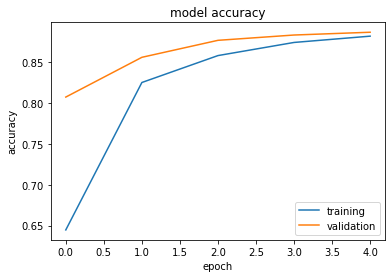

Test loss: 0.2907
Test accuracy: 0.9175


In [76]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')

## For batch size=224

In [77]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train, 
                      y_train,
                      validation_data=(x_test, y_test),
                      batch_size=224,
                      epochs=5,
                 validation_split=0.1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.4681 - accuracy: 0.8889 - val_loss: 0.4433 - val_accuracy: 0.8945
Epoch 2/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.4471 - accuracy: 0.8923 - val_loss: 0.4291 - val_accuracy: 0.8949
Epoch 3/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.4281 - accuracy: 0.8956 - val_loss: 0.4140 - val_accuracy: 0.9005
Epoch 4/5
60000/60000 [==============================] - 1s 19us/step - loss: 0.4119 - accuracy: 0.8979 - val_loss: 0.3992 - val_accuracy: 0.9010
Epoch 5/5
60000/60000 [==============================] - 1s 19us/step - loss: 0.3981 - accuracy: 0.9008 - val_loss: 0.3927 - val_accuracy: 0.9008


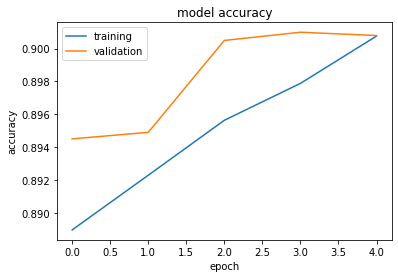

Test loss: 0.2907
Test accuracy: 0.9175


In [78]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.4}')
print(f'Test accuracy: {accuracy:.4}')